
## Minimum Norm Solution






## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [4]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [5]:

import PDFshapingUtils as PDF_tk


In [6]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [7]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [8]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [9]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

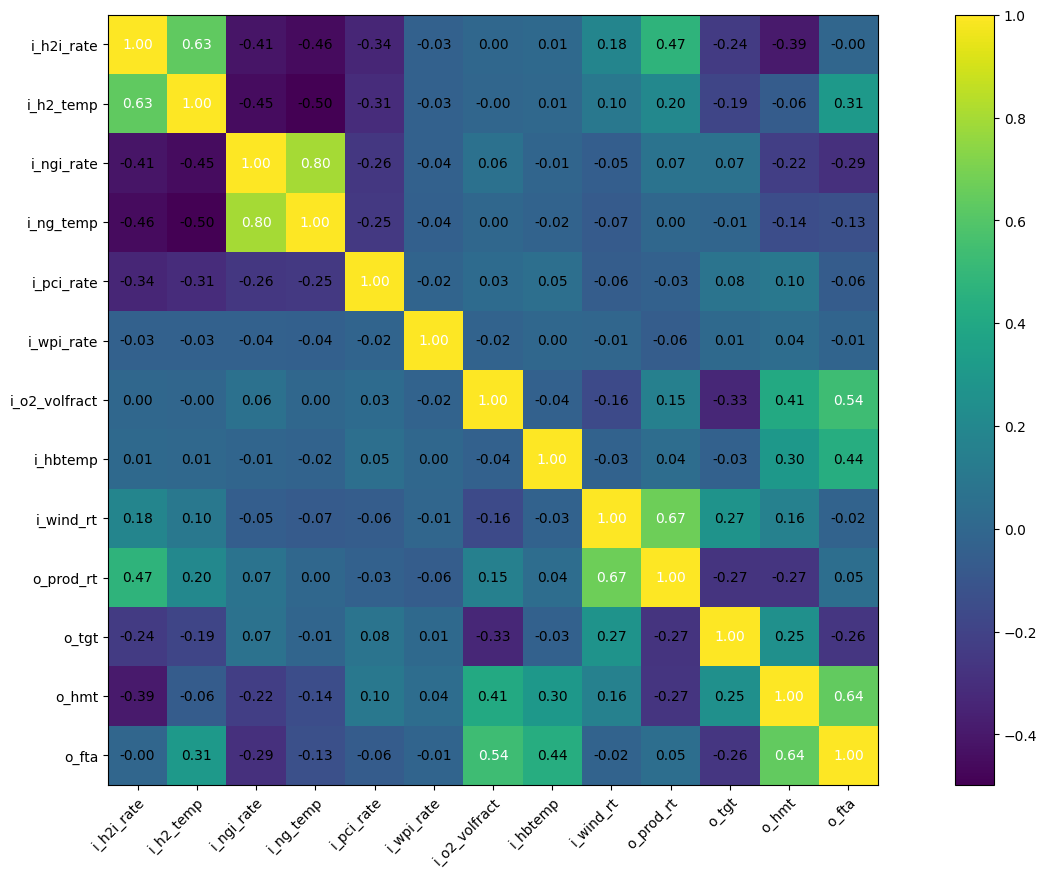

In [10]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [11]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [12]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [13]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [14]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [15]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [16]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca





In [18]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 4)
(1000, 4)
(3999, 4)
(1000, 4)


In [19]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [20]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [21]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [22]:

n_inputs  = 4     ## 7
n_outputs = 4




#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(n_inputs, n_outputs)       
        
        ## F2
        self.f2_linear1 = nn.Linear(n_inputs, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, n_outputs)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [23]:

n_inputs  = 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [24]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     F1plusF2_SIO_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [25]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.8642606139183044
100 ..... 0.9454501867294312
200 ..... 0.6694237589836121
300 ..... 1.2088021039962769
400 ..... 0.7109584808349609
500 ..... 0.8809354305267334
600 ..... 0.5806235671043396
700 ..... 0.6869073510169983
800 ..... 0.4594603478908539
900 ..... 0.8985416293144226


In [26]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  98.2383, 1297.0133, 8445.4629, 2304.7952]])
y_deviations: tensor([[  50.3140,  522.7396, 1517.4135,  210.5718]])
x_means: tensor([[     0.0000,     -0.0000,     -0.0000,      0.0000]])
x_deviations: tensor([[362.3088, 157.8797,  51.3072,  31.4018]])


In [27]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  47.9243,  774.2737, 6928.0493, 2094.2234]])
tensor([[ 148.5522, 1819.7529, 9962.8760, 2515.3669]])


In [28]:

print(PDFshapingOBJ.x_means -  PDFshapingOBJ.x_deviations)
print(PDFshapingOBJ.x_means +  PDFshapingOBJ.x_deviations)


tensor([[-362.3088, -157.8797,  -51.3072,  -31.4018]])
tensor([[362.3088, 157.8797,  51.3072,  31.4018]])



## Is model  invertible ?

* use the Jacobian


In [29]:

import torch
from torch.autograd.functional import jacobian


In [30]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

x = torch.randn(      4, requires_grad=True)  # shape [7]


In [31]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [32]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [33]:

print( len(J) )


1


In [34]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 4])


In [35]:

u, s, v = torch.svd(J)  


In [36]:

rank = (s > 1e-5).sum()


In [37]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4



## Example of Min Norm Solution


In [38]:

import torch
from torch.autograd.functional import jacobian

def solve_minimum_norm_update(x0, target_y):
    """
    Computes a minimum-norm update step for the input x0 towards the target_y.
    
    Args:
        model (nn.Module): The neural network.
        x0 (torch.Tensor): Initial guess for the input.
        target_y (torch.Tensor): The desired output.

    Returns:
        torch.Tensor: The minimum-norm update to x0 (Delta x).
    """
    # Ensure the input requires gradients
    
    x = x0.detach().clone().requires_grad_(True)
    
    # Define a function to compute the output for use with jacobian()
    ## def func(input_x):
    ##    return model(input_x)

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    J_pinv = torch.pinverse(J)
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    delta_x = J_pinv @ delta_y
    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x


###################################################################
# Example usage with a simple model (ensure model is defined)
## model = model_Forward()

input_dim  = 4
output_dim = 4

x0       = torch.randn(1, input_dim)

target_y = torch.randn(1, output_dim)
delta_x = solve_minimum_norm_update( x0, target_y)

x_new = x0 + delta_x

print( x_new )



tensor([[-12088.0127,   2630.1716,    314.0759,  -1997.0787]],
       grad_fn=<AddBackward0>)



## Approach


In [39]:

import numpy as np
from numpy.linalg import norm

# --- distance function ---
def euclid(a, b):
    return norm(a - b)


In [40]:

def solve_lm_update2(x0, target_y, lambda_val=1e-3, 
                     tol_update=1e-4, tol_error=1e-3):
    # Clone input and enable gradient tracking
    x = x0.detach().clone().requires_grad_(True)

    # Jacobian: shape (output_dim, input_dim)
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)

    # Compute residual
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y

    # -----------------------------
    # Early Stop #1: error already small
    # -----------------------------
    if delta_y.norm().item() < tol_error:
        print("Early STOP (error small)")
        return torch.zeros_like(x0)

    # Flatten if needed
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)

    # ----- Levenberg–Marquardt update -----
    JJ = J @ J.T
    damping = lambda_val * torch.eye(JJ.size(0), device=JJ.device)
    JJ_damped_inv = torch.inverse(JJ + damping)

    # LM step: Δx = Jᵀ (JJ + λI)^(-1) Δy
    delta_x = J.T @ JJ_damped_inv @ delta_y

    # Apply same scaling you originally used
    delta_x = 0.01 * delta_x

    # -----------------------------
    # Early Stop #2: update too small
    # -----------------------------
    if delta_x.norm().item() < tol_update:
        print("Early STOP (update tiny)")
        return delta_x.view_as(x0)

    # Return reshaped update
    return delta_x.view_as(x0)



In [41]:

def solve_minimum_norm_update2(x0, target_y, tol_update=1e-4, tol_error=1e-3):
    
    # Ensure the input requires gradients
    x = x0.detach().clone().requires_grad_(True)

    # Compute the Jacobian matrix at the current input x
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)

    # Calculate current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y

    # Early stop condition #1: error already small
    if delta_y.norm().item() < tol_error:
        print("Early STOP: small error")
        return torch.zeros_like(x0)

    print(J.shape)

    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)

    # Compute pseudoinverse of the Jacobian using SVD
    U, S, Vt = torch.linalg.svd(J)
    S_inv = torch.where(S > 1e-2, 1.0/S, torch.zeros_like(S))
    J_pinv = Vt.T @ torch.diag(S_inv) @ U.T

    # Calculate the minimum norm update
    delta_x = J_pinv @ delta_y
    delta_x = 0.01 * delta_x  # your original scale

    # Early stop condition #2: update too small
    if delta_x.norm().item() < tol_update:
        print("Early STOP: update too small")
        return delta_x.view_as(x0)

    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)

    return delta_x



In [42]:


def solve_lm_update(x0, target_y, lambda_val=1e-3):
    # Clone input and enable gradient tracking
    x = x0.detach().clone().requires_grad_(True)

    # Jacobian: shape (output_dim, input_dim)
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)

    # Compute residual
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y

    # Flatten if needed (same as your original logic)
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)

    # ----- Levenberg–Marquardt update -----
    # J: (m x n), normally (4 x 4) after PCA
    # JJ: (m x m)
    JJ = J @ J.T

    # Add damping λI  (same dimension as JJ)
    damping = lambda_val * torch.eye(JJ.size(0), device=JJ.device)

    # Compute LM inverse: (JJ + λI)^(-1)
    JJ_damped_inv = torch.inverse(JJ + damping)

    # LM step: Δx = Jᵀ (JJ + λI)^(-1) Δy
    delta_x = J.T @ JJ_damped_inv @ delta_y

    # Optional scaling (your code used 0.01)
    delta_x = 0.01 * delta_x

    # Reshape delta_x to match original x0 shape
    return delta_x.view_as(x0)




In [43]:


def solve_minimum_norm_update( x0, target_y):
   
    
    # Ensure the input requires gradients

    x = x0.detach().clone().requires_grad_(True)
    

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y
    
    print( J.shape )
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    ####################################
    #J_pinv = torch.pinverse(J)
    
    thresholdSVD = 1e-2   ## 1e-2
    U, S, Vt = torch.linalg.svd(J)
    S_inv = torch.where(S > thresholdSVD, 1.0/S, torch.zeros_like(S))
    J_pinv = Vt.T @ torch.diag(S_inv) @ U.T

    
    ####################################
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    ## delta_x = J_pinv @ delta_y
    delta_x = 0.01 * (J_pinv @ delta_y)    ## 0.01

    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x







In [44]:



x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point

dist_method_A = []


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    for j in range(5):
        
        delta_x  = solve_minimum_norm_update( x_temp, target_y )
        x_temp   = x_temp + delta_x
        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    x_new_solution    = pca.inverse_transform( x_new_np   )
    x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_solution )
    print( x_real_np_sol )
    
    dist_method_A.append( euclid(x_new_np, x_real_np) )
    
    print(i)
    print('********************************')



torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   7.68504548    2.05868555   61.52918739   25.35408366  -18.11535428
 1552.54058872  197.95878945]
[  19.75449877    1.73897017    1.72307832   24.97966564  299.85209383
 1600.02844554  202.22277914]
1
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.20635894    1.27941034   42.39459844   25.25516378    2.90957954
 1447.79141221  200.12143866]
[  13.30451095   -1.60657552   58.31477727   25.59630644  300.25759477
 1480.04847614  198.89169389]
2
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   5.58736135    2.95480602   77.09913234   25.49144319  -29.88231872
 1568.42532465  196.59651996]
[   9.1607898    11.39175582   41.38606109   25.29041907   -0.14184192
 1480.01314682  199.1599

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.83923428    1.42538625   31.42273118   25.15213527   24.26142258
 1466.29664688  200.83408847]
[   6.81083587    1.03947591   71.04285767   25.53032273   -0.10361683
 1448.00709623  197.94496063]
61
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   8.29931739    1.59442583   59.4931002    25.3859691     7.08704273
 1504.14385789  198.44228759]
[  -2.24845644   -0.54058599  149.45862984   26.28391999    0.03012946
 1447.98929258  192.06673006]
62
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   7.86584207    1.17093229   63.76609708   25.40446128    6.04906104
 1530.56649322  197.99016866]
[  20.57460369   -2.61065007   -2.74163945   25.01752918  300.46039811
 1448.09177754  203.84884973]
63
********************************
torch.Size([1, 4, 4])


torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   8.48884216    0.94113383   55.22080608   25.32536272  -17.50485984
 1497.80070741  198.86725707]
[  10.89768241   39.74548325   -1.02187588   25.07639356   -0.17483012
 1479.80374369  200.04492142]
133
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.81324171    0.44495819   31.55282356   25.13834366   16.0504261
 1468.77551783  200.892444  ]
[  10.9575328    -1.28476735   39.95100699   25.09936452   -0.17587545
 1599.80099747  199.60196   ]
134
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  17.29834158    0.57849511  -13.08375594   24.81850682   43.21217066
 1341.43863288  205.0692857 ]
[   1.39305897   -2.634985    117.61022407   26.14077003   -0.02478294
 1199.79023511  196.18698299]
135
*********

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.37130081    1.21110308   49.18630049   25.29053828   -3.0550363
 1482.88637396  199.39497051]
[  -7.11623779  198.42488163   -1.54053885   26.09898034    0.10675492
 1599.95777066  186.11154535]
205
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.97204697    0.51024205   31.5792708    25.15024596   27.31951572
 1465.40530514  200.90331444]
[  -2.03878206   -0.52965949  149.50125073   26.17287132    0.03375763
 1599.97670177  191.14131779]
206
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.14923488    3.61042421   49.12486164   25.28948548   -2.28155131
 1507.30424013  199.05126533]
[   9.70453666    4.34095841   45.1011678    25.18884895   -0.14378611
 1600.22187732  198.73509432]
207
********************************
torch.Size([1, 4, 4]

torch.Size([1, 4, 4])
[  15.84233574   -0.23236986    0.19831747   24.914255     40.97224692
 1377.30931945  203.90195192]
[   6.6387727    71.12527362    1.12943926   25.52338719   -0.09845707
 1200.01126695  198.95667337]
277
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.05086874    1.13400116   -2.3224538    24.90776767   45.9837456
 1371.0269926   204.01826096]
[   9.21618193   45.50253284    4.262703     25.3736085    -0.13137477
 1200.23114045  200.8538987 ]
278
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   4.53071177    2.41146012   86.47410512   25.57394483  -31.29413225
 1573.87172636  195.89057365]
[   3.64242573   60.39853983   40.39538632   25.62537915   -0.05985653
 1479.99910155  195.14539006]
279
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4]

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.83922068    1.60432846   44.40526906   25.26199511   -4.28019953
 1460.73541307  199.86308062]
[   5.91477033    0.7573132    80.75306633   25.51147486   -0.0946887
 1600.00281068  196.30298578]
350
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.77172369    1.7676782    38.12993784   25.20373144    8.4017263
 1471.67565194  200.26176721]
[  10.33664988    1.5079718    42.49779577   25.14368591   -0.16224193
 1600.01365097  199.17236232]
351
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   2.69995408   -1.32413318  104.5789578    25.7247993   -38.67764711
 1565.29372302  194.86808463]
[   3.05103606    0.502466    100.48234238   25.99564008   -0.0506213
 1200.01288881  197.236

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.57387926    0.76750843   45.53776896   25.24703731  -20.02856615
 1471.55693121  199.7834446 ]
[   2.00039209   -2.80533858  117.44245712   25.84437291   -0.03905321
 1599.77902605  193.78963344]
423
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.17364722    1.5909632    11.10490458   24.99973144   26.90077678
 1408.38745544  202.7280481 ]
[   9.09720273    4.51131115   45.26893824   25.48524609   -0.12954613
 1200.23307093  201.13244378]
424
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   7.75892053    2.89491136   62.2769324    25.42544732    3.75430551
 1496.28458     198.16862232]
[   3.55835309    3.50780501   93.24838048   25.94607744   -0.05190142
 1200.22610769  197.

torch.Size([1, 4, 4])
[   9.08090139    1.66648974   52.54353052   25.32957856    6.59976511
 1488.8271036   199.06185288]
[   1.1529897     0.03684339  120.03149672   26.0010054    -0.02182999
 1447.99763145  194.27394295]
495
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   7.18158516    2.57189284   66.37904446   25.41893653   -9.0188166
 1543.10615805  197.59973846]
[  -2.665281      2.28320645  152.07633344   26.21761357    0.04978733
 1600.1871339   190.70788456]
496
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.48800693    1.15810245   42.75006475   25.25223242   20.53522381
 1473.91301292  199.942735  ]
[  19.9419596    -1.42518706   -1.53888887   25.21949068  300.31566739
 1200.08656687  205.16096229]
497
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4]

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.19577558    0.40442233   14.29809972   25.01868984   41.91764306
 1429.43120913  202.45201953]
[  20.90711724   -3.28348677   -3.1196348    24.89748921  300.13721589
 1599.84781258  203.01421144]
564
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   7.27527387    1.78112912   66.88738592   25.40835798   -6.46209382
 1559.39194021  197.5275964 ]
[  33.49408956    0.09398632    0.01989764   25.94100598 1200.1055084
 1200.06535107  204.74865281]
565
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   7.65844808    2.59717384   64.54924078   25.43400408   10.29209728
 1518.84935283  197.88133448]
[   7.79546255    2.60694057  102.36030993   25.96703566  300.03892089
 1600.21329397  194.43580562]
566
*******************************

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.91815405    0.42621512   16.07260489   25.06935101   41.81865715
 1384.08150254  202.58908699]
[  -2.20638279   -0.5308736   149.47802393   26.26069633    0.031779
 1479.98582441  191.87049379]
635
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.08221987    0.90057798   54.5263742    25.35431489   16.4977066
 1484.55476264  198.99787495]
[  25.3657402    -4.89682484   -4.81306513   25.395274    600.37294829
 1199.89061338  205.64746356]
636
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   5.7121578     1.63474454   76.51778384   25.49430316  -33.48461685
 1540.36424712  196.92201194]
[  -0.96014538  146.56498293   -3.18152108   25.71843643    0.00391799
 1599.76581483  190.56718988]
637
********************************


torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  12.31346365    0.62361277   26.48379739   25.10333283   13.02732113
 1447.66154971  201.39458409]
[  20.20778156   -1.05498571   -0.84693995   25.02316922  299.83648143
 1479.82491091  203.38155328]
707
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   5.51237057    5.62435451   75.29757929   25.49507313  -28.44419395
 1566.63266473  196.52237643]
[  32.3470869     5.09631795    4.83431764   26.02276157 1199.81799408
 1200.2482054   203.96105585]
708
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.8506328     2.33635948   11.8973732    24.97787359   14.44041283
 1442.71401428  202.39933104]
[  20.19655127   -1.01473993   -0.7903567    25.02401086  299.84129226
 1479.82047607  203.37388316]
709
********************************
torch.Size([1, 4, 4

torch.Size([1, 4, 4])
[   9.52960772    2.25302789   47.51966842   25.27159575    0.61923925
 1500.40640989  199.32886996]
[  32.07841219    6.22123653    5.99642342   26.04189948 1199.66983129
 1200.23107699  203.77822139]
779
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.72771532    1.03199983   39.94813739   25.20795424   12.50440077
 1487.35210255  200.0880406 ]
[  25.43010849   -2.79721709   -2.62832904   25.13757352  600.06474823
 1599.84294144  202.88060985]
780
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   5.72004562    3.25845518   77.31789144   25.51507298  -16.26669695
 1556.38579067  196.62486806]
[  -2.88056935    2.29239997  152.06199987   26.32908302    0.04858516
 1448.19751512  191.62946229]
781
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4

torch.Size([1, 4, 4])
[   5.30639119    0.66414427   83.50844442   25.55097727  -15.93463856
 1565.20663412  196.31340897]
[  23.47777647    5.05701074    4.79452802   25.35273799  599.79610698
 1480.24093107  202.38108574]
852
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   6.54534442    1.19347698   73.06232123   25.48269159   -8.48642584
 1532.38330068  197.26744715]
[  14.11545557   -4.47859266   55.67804684   25.46247674  300.23632386
 1599.83556589  198.60745602]
853
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.26819098    1.12509753   49.09909263   25.28471683  -10.8240134
 1480.65218816  199.42380999]
[   1.36827887    0.02764872  120.04582849   25.88953595   -0.0205974
 1599.98725237  193.35236543]
854
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])

[  11.14313845    0.90538824   37.49416389   25.20518631   21.6033295
 1466.89258789  200.40902411]
[  15.74535738   -1.24052966   38.69162393   25.31945089  300.22252973
 1600.04712886  199.63782805]
924
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.85770937    1.07359885   37.36943663   25.21221697    5.85030897
 1440.67284626  200.56637684]
[  15.57214145   -1.22162045   38.69668854   25.40769673  300.22295461
 1480.05403406  200.36316897]
925
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.27441776    0.30378683   36.68866108   25.18249538   18.45463943
 1478.02905826  200.4540577 ]
[  14.9749808    -3.14107506   47.05940126   25.38773061  300.07323587
 1599.81900281  199.15652403]
926
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4]

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   8.2241953     2.65717205   57.3404804    25.32951921   -9.99967041
 1544.64379754  198.27624481]
[  23.64537736    5.05822406    4.81775418   25.26491296  599.79808559
 1600.23180081  201.6519099 ]
996
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   3.32710721    5.18953303   93.58060402   25.61642902  -39.32201362
 1628.55555936  194.78404166]
[  33.47492486    2.73649755    2.42720921   25.68935107 1200.107298
 1600.26458962  201.91787035]
997
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.04099884    0.89213105   36.38697721   25.18901926    7.190469
 1458.90216058  200.54608482]
[  -4.35986407  173.93155431   -1.03105302   25.93171075    0.06696039
 1599.96369214  188.1168981 ]
998
************

In [45]:

avg_A = np.mean(dist_method_A)


print("Average Euclidean Distance:")
print("Method A:", avg_A)


Average Euclidean Distance:
Method A: 365.17328



## LM 

* LM = Levenberg–Marquardt update
* It is the damped version of the minimum-norm / Gauss–Newton inverse update.


In [46]:

x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point

dist_method_A = []


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    for j in range(5):
        
        ## delta_x  = solve_minimum_norm_update( x_temp, target_y )
        delta_x  = solve_lm_update2(           x_temp, target_y)
        x_temp   = x_temp + delta_x
        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    x_new_solution    = pca.inverse_transform( x_new_np   )
    x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_solution )
    print( x_real_np_sol )
    
    dist_method_A.append( euclid(x_new_np, x_real_np) )
    
    print(i)
    print('********************************')




[   9.76443128    1.70891316   46.28214602   25.24543847    1.00284923
 1514.79796672  199.3818353 ]
[  19.75449877    1.73897017    1.72307832   24.97966564  299.85209383
 1600.02844554  202.22277914]
1
********************************
[   9.68186752    1.42965213   45.69367374   25.27384813   -5.72933947
 1458.50230437  199.79271353]
[  13.30451095   -1.60657552   58.31477727   25.59630644  300.25759477
 1480.04847614  198.89169389]
2
********************************
[   8.09124614    1.88366136   59.39613379   25.36292498   -6.65094355
 1522.55423968  198.31652455]
[   9.1607898    11.39175582   41.38606109   25.29041907   -0.14184192
 1480.01314682  199.15993166]
3
********************************
[  10.85957432    2.04966208   38.0162574    25.19451644   13.55349849
 1490.84968767  200.12977351]
[   8.52306036   14.24486653   44.01772742   25.33600294   -0.12102061
 1480.21915545  198.71882831]
4
********************************
[   8.26301099    1.57825341   59.98932687   25.3780

[  12.24529998    0.70148825   27.3165083    25.10925896   15.01136801
 1453.48595371  201.28859101]
[  20.3866127    -1.09401831   -0.88029596   24.93450257  299.83365308
 1599.82021934  202.66004746]
67
********************************
[  10.37886871    0.62061101   43.60695154   25.25464138   16.16232899
 1472.25960267  199.93275173]
[   9.0540747    -3.03890907   97.18185392   25.87713037  300.00444687
 1599.79463551  195.30650669]
68
********************************
[  10.22884447    1.32440729   44.65964117   25.2787029    20.4163614
 1464.68301959  199.83846088]
[  15.14925385   -1.11042306   38.80281119   25.61500639  300.23196264
 1200.06276498  202.0428476 ]
69
********************************
[  10.64294975    1.42559638   40.66266586   25.24099395   17.80246664
 1461.17744942  200.1580949 ]
[  19.68451518   -0.34051635   -0.43336576   25.23778694  300.16268219
 1200.0738809   204.98579802]
70
********************************
[  11.89129936    0.96607878   29.38265218   25.1

[  11.0772705     1.44406508   37.7844742    25.19595526   21.58149387
 1488.46499526  200.21105882]
[   7.03735518    0.99003462   71.00060682   25.41801164   -0.10720655
 1600.00115479  197.03105324]
139
********************************
[  10.61569164    0.64330816   41.38211015   25.24587119   16.27380037
 1454.98580267  200.20606099]
[  14.38449226   -3.03109099   47.14229788   25.6828653   300.08026342
 1199.83686016  201.56537851]
140
********************************
[   8.29111195    2.96358055   56.04027824   25.33010865  -11.74482906
 1527.66339606  198.45356824]
[   8.55769552   24.2226007    33.98791381   25.30835343   -0.12384992
 1480.22089793  198.65472582]
141
********************************
[  10.45334568    1.83160114   41.21433413   25.24248771   12.44000595
 1464.71201942  200.06148972]
[  -8.35007093  201.4080928     1.20232436   26.44011975    0.13702468
 1200.17942712  188.07546125]
142
********************************
[  11.23438696    1.00303037   34.57967337  

[   9.5660727     1.2633231    47.62072844   25.28549557   -0.97230635
 1471.65182256  199.57831625]
[  13.29889583   -1.5864524    58.34306844   25.59672726  300.26000017
 1480.04625871  198.88785885]
212
********************************
[   8.76935068    2.04190766   50.89909257   25.30643185  -21.77229056
 1472.22801715  199.26240607]
[   7.58068214    1.29249575   61.27445797   25.61884146   -0.11749433
 1200.02178351  200.17564544]
213
********************************
[  10.49162093    0.9198252    41.78424294   25.21736013    9.70369376
 1494.9050401   199.91141184]
[  25.24566236   -2.73806167   -2.56668178   25.22666098  600.06998765
 1479.84542327  203.5982806 ]
214
********************************
[   7.61813791    2.29635638   61.92336426   25.37559498  -15.88295727
 1533.09507848  198.02619127]
[  24.28310583    2.20511455    2.18609095   25.21932911  599.77723391
 1600.02579577  202.09301289]
215
********************************
[  11.83482765    0.64431157   30.46939364  

[   9.71390574    1.3871224    48.44029312   25.2957205    14.43883271
 1486.02813218  199.41518284]
[  20.54929373   -1.59554157   -1.70666005   24.92309353  300.30142359
 1600.075358    202.76361313]
284
********************************
[  10.19508453    1.56134294   45.58728117   25.26185642   23.33537796
 1505.3067725   199.50081533]
[  33.49408956    0.09398632    0.01989764   25.94100598 1200.1055084
 1200.06535107  204.74865281]
285
********************************
[  12.2234004     0.64078491   28.52921902   25.12103317   21.78131886
 1460.10439862  201.15934309]
[  24.55971524   -1.52206873   -1.32674483   25.45268773  599.92842927
 1199.83925848  205.09895972]
286
********************************
[   9.11925677    1.21589859   52.73187192   25.30555463    4.52440563
 1517.56116949  198.91124679]
[  20.53806344   -1.55529564   -1.65007684   24.92393517  300.30623435
 1600.07093079  202.75594295]
287
********************************
[  10.14985528    1.42224152   43.17840329   

[  13.5947519     0.77241521   16.65735323   25.03584195   24.40531538
 1422.48239447  202.2858303 ]
[  -1.78232126  149.47725192   -0.48820773   25.85310778    0.02997887
 1479.9742976   190.8437571 ]
357
********************************
[  10.41275136    1.38796831   40.90716511   25.23764853    5.04703533
 1455.18718012  200.18115994]
[   4.44041174   90.69579145    0.68790023   25.6566979    -0.06949643
 1200.00920137  197.35699291]
358
********************************
[   7.28599313    2.15599449   65.04027879   25.42019751  -13.02106574
 1515.40128147  197.90572824]
[  19.80226993    0.64336725    0.57492978   25.07241798  300.00144654
 1448.05371954  203.32335651]
359
********************************
[  13.44090573    1.00187725   16.74941245   25.02799151   16.34580407
 1428.11062415  202.22699569]
[   7.24049205   70.97504122    0.98996061   25.22741088   -0.11027056
 1599.99783704  196.55548916]
360
********************************
[   8.84640081    2.41815642   53.82414773  

[   8.6000328     1.01607499   55.60050379   25.33950042   -6.66846139
 1495.71450413  198.84254364]
[  -7.11623779  198.42488163   -1.54053885   26.09898034    0.10675492
 1599.95777066  186.11154535]
430
********************************
[   9.86840595    0.90499668   48.12767572   25.28915975   18.09311522
 1490.04510499  199.45436331]
[  25.69878401   -3.92213615   -3.79043727   25.1184356   600.21294145
 1599.86007006  203.06344454]
431
********************************
[  10.66820183    1.46101733   40.58675759   25.22612961   17.36359008
 1480.29981092  200.04513209]
[  24.19627674    0.18599901    0.11452148   25.47871287  600.095048
 1200.06459797  204.84452631]
432
********************************
[  12.83405287    0.67971614   22.11228041   25.07951706   15.82285274
 1425.5157171   201.85867247]
[   5.48418278   87.79185104   -1.96501099   25.40506684   -0.0921304
 1479.78780564  196.10691235]
433
********************************
[  12.69682931    0.78628064   24.07201924   25

[   9.08296009    1.26024756   53.72450524   25.35306489   13.86786304
 1476.27980419  199.0799554 ]
[  10.61960792   -1.90045414   78.01069557   25.991805    300.29883562
 1200.0538703   199.10373241]
503
********************************
[   8.15460781    1.82628296   60.20772569   25.39756142    5.43497333
 1498.32359303  198.40374519]
[  -2.6180401    -0.45992054  149.52756337   26.46716438    0.03598778
 1199.9989864   193.55784243]
504
********************************
[   9.01292699    2.97999315   53.37150021   25.32381      14.62184654
 1528.72089693  198.64546877]
[  33.02741861    3.90044852    3.62267269   25.79715564 1199.96194833
 1480.25215651  202.45654157]
505
********************************
[  12.42688085    1.29141073   24.82417517   25.09637708   13.22601064
 1441.69656315  201.50216451]
[  -2.22998804  152.25108226    2.05351533   25.80918333    0.04319511
 1600.18004594  189.68881854]
506
********************************
[   5.14288242    2.13626169   78.38985627  

[  11.97391441    1.02031293   29.33132989   25.13094319   15.15189656
 1453.91021254  201.10495499]
[  10.35581427   -1.13453781   40.09048523   25.39534083   -0.1640314
 1199.8144124   202.00314456]
576
********************************
[  10.71465756    0.73754152   42.0591746    25.22768497   24.55103706
 1498.38326371  199.88173047]
[  25.68755321   -3.88188977   -3.73385286   25.11927724  600.21773331
 1599.85562745  203.05577433]
577
********************************
[   9.24194086    1.99706657   51.40325999   25.31092176    9.28688935
 1505.09655142  199.02254704]
[   7.60540112    2.68621979  102.4502485    26.05654394  300.04656
 1480.21355832  195.14964126]
578
********************************
[  11.3648394     0.42097289   35.22765789   25.15634742   12.97315863
 1489.59560037  200.48715993]
[  20.45961079   -2.1195345    -1.92417035   25.00529379  299.99187016
 1479.83537948  203.55288248]
579
********************************
[   9.96540238    0.70002181   44.89261917   25.

[  10.55391278    1.01179566   42.33618335   25.23446087   19.10198711
 1489.71808506  199.89113539]
[  -2.03878206   -0.52965949  149.50125073   26.17287132    0.03375763
 1599.97670177  191.14131779]
648
********************************
[   9.36354313    0.91457612   51.56949952   25.32146995   12.1594253
 1485.58839849  199.21787308]
[  25.09706548   -3.77190666   -3.65095877   25.41441191  600.2247854
 1199.87350025  205.46462899]
649
********************************
[  10.09606158    1.83393082   42.28517645   25.24930638   -1.58651005
 1454.89480226  200.04131502]
[   9.85952596   42.62929846    1.60274788   25.32760381   -0.15462243
 1200.02735675  201.29883692]
650
********************************
[   9.02456791    1.64821893   54.44560502   25.30468621   11.43213569
 1552.9308313   198.52815211]
[  34.35325282   -1.1409162    -1.22510435   25.6267334  1200.24664954
 1600.0646069   202.52263285]
651
********************************
[   9.55249707    2.71873215   47.27508179   2

[   9.62993218    1.24989397   49.98684996   25.30043682   18.23382156
 1502.83200647  199.20554764]
[  20.57460369   -2.61065007   -2.74163945   25.01752918  300.46039811
 1448.09177754  203.84884973]
721
********************************
[   7.83603157    1.14139774   61.04549442   25.38381738  -14.12657147
 1501.01422253  198.38400456]
[  -3.72213514  171.07844218   -3.66271762   25.88612686    0.04610852
 1599.75768714  188.55800142]
722
********************************
[   9.56055489    1.18468926   46.80631878   25.27077009   -8.20387737
 1472.5253829   199.64334096]
[  10.90329699   39.72536082   -1.05016595   25.07597274   -0.17725645
 1479.80596095  200.04875633]
723
********************************
[   9.39000485   -0.01553367   51.36418541   25.30123869    4.64948678
 1493.60618753  199.26403372]
[   6.42208728    3.76265253   73.51910477   25.46191223   -0.09596879
 1600.21602956  196.60529039]
724
********************************
[   8.62268366    2.28425722   55.17470041  

[  10.8810046     0.97397547   37.0990842    25.17678196    1.00499769
 1479.30561531  200.36214563]
[  10.9575328    -1.28476735   39.95100699   25.09936452   -0.17587545
 1599.80099747  199.60196   ]
793
********************************
[  11.32449582    0.55999522   33.70686183   25.16554843    3.59630926
 1448.3077705   200.84410497]
[   3.6606893    -2.25002923   97.99213486   25.95216031   -0.05943267
 1199.79579295  197.65845806]
794
********************************
[   9.27753844    2.12446747   50.6777319    25.29671181    6.29006706
 1512.883156    199.02087824]
[  10.051863      3.03213918   82.79880467   25.77926756  300.0090914
 1600.21442474  195.89961071]
795
********************************
[  10.38756352    1.52300642   42.36196874   25.20668608    9.32875391
 1522.50816392  199.64954496]
[  24.26626043    2.26548357    2.27096537   25.22059156  599.78445202
 1600.01914734  202.0815077 ]
796
********************************
[  12.36007084    0.2721868    28.89398945   

[   8.62322776    3.08333673   54.10627467   25.34573425   -0.95011946
 1493.19591753  198.798727  ]
[   3.92793705    3.42713821   93.1794456    25.76283304   -0.05775985
 1448.21641008  196.04772266]
864
********************************
[  11.2192233     1.41884326   35.69466651   25.17339782   15.02597535
 1484.28940217  200.39985786]
[  10.09890073    1.59765779   42.59662852   25.25683863   -0.15383004
 1448.01515768  200.07859978]
865
********************************
[  10.08656511    3.01164765   42.55444657   25.23353113    4.66801244
 1497.83800812  199.66092973]
[  32.50691376    6.0899175     5.86201219   25.834169   1199.65837408
 1480.22456698  202.10237747]
866
********************************
[  10.43695587    1.01621613   42.75495806   25.24335349   15.690975
 1479.61411367  199.92054185]
[  25.43572389   -2.81734028   -2.65662124   25.1371527   600.0623523
 1599.84516275  202.88444495]
867
********************************
[  10.95048143    1.68535277   36.80202895   25

[  12.24110828    1.91277736   25.92677777   25.09450733   12.21017769
 1463.77561903  201.23215146]
[   9.51447513    4.42023687   45.1911073    25.27835724   -0.13615071
 1480.22213021  199.44893002]
923
********************************
[  10.59885622    1.2142361    41.35189638   25.23445946   17.21622641
 1476.59586333  200.02956411]
[  15.74535738   -1.24052966   38.69162393   25.31945089  300.22252973
 1600.04712886  199.63782805]
924
********************************
[   9.90133671    1.44868818   44.52688133   25.26790247   -0.16329983
 1457.14763182  199.8877369 ]
[  15.57214145   -1.22162045   38.69668854   25.40769673  300.22295461
 1480.05403406  200.36316897]
925
********************************
[  11.02081571    0.43366038   38.90437596   25.20504146   19.78527154
 1479.39155472  200.26488904]
[  14.9749808    -3.14107506   47.05940126   25.38773061  300.07323587
 1599.81900281  199.15652403]
926
********************************
[  10.67086341    0.6585278    40.60829066  

[  10.24792777    0.75482153   45.5694413    25.2585459    21.14648627
 1499.54857124  199.6048082 ]
[  34.28603097   -1.74540169   -1.55578209   25.70725038 1199.92749352
 1479.83349439  203.32724261]
981
********************************
[   8.88831373    1.78059139   54.37552067   25.34555153    8.443703
 1494.43753833  198.87756879]
[  -2.24845644   -0.54058599  149.45862984   26.28391999    0.03012946
 1447.98929258  192.06673006]
982
********************************
[  10.8336052     0.4448711    39.94489421   25.20440791   14.81431047
 1488.94989613  200.12718498]
[  11.31047499   -2.61370981   77.62034933   25.68936229  299.97461745
 1599.79576627  196.77031168]
983
********************************
[  12.01672762    1.01986956   30.79301744   25.12667309   25.7209008
 1490.27733514  200.77057876]
[  34.01174116   -0.60036126   -0.3653852    25.72680909 1199.78172641
 1479.81415996  203.14057315]
984
********************************
[  10.9466085     1.03922265   37.61961397   25

In [47]:

avg_A = np.mean(dist_method_A)


print("Average Euclidean Distance:")
print("Method A:", avg_A)


Average Euclidean Distance:
Method A: 357.935
